In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
df = pd.read_csv("mcdonalds.csv")

In [3]:
#Inspecting the dataset 
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
df.shape

(1453, 15)

In [6]:
#Label Encoding Segmentation Variables 
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
df['yummy'] = labelen.fit_transform(df['yummy']) 
df['convenient'] = labelen.fit_transform(df['convenient']) 
df['spicy'] = labelen.fit_transform(df['spicy']) 
df['fattening'] = labelen.fit_transform(df['fattening']) 
df['greasy'] = labelen.fit_transform(df['greasy']) 
df['fast'] = labelen.fit_transform(df['fast']) 
df['cheap'] = labelen.fit_transform(df['cheap']) 
df['tasty'] = labelen.fit_transform(df['tasty']) 
df['expensive'] = labelen.fit_transform(df['expensive']) 
df['healthy'] = labelen.fit_transform(df['healthy']) 
df['disgusting'] = labelen.fit_transform(df['disgusting']) 

In [7]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [8]:
#Principal Component Analysis 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty',
                                           'expensive','healthy','disgusting']])
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

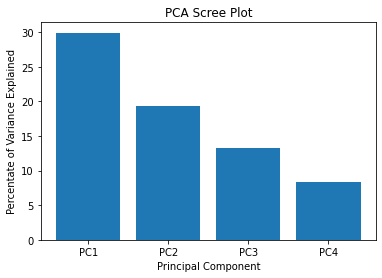

In [9]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

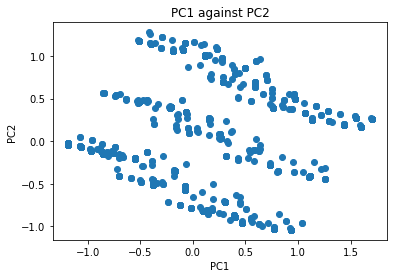

In [10]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')